<img src="img/es2_logo.jpg" alt="EarthServer-logo" width="50%"  border="4">
<br><br>


# Web Services for Big Earth Data

## Intoduction to Web Coverage Processing Service

### Oliver Clements

## Web Coverage Processing Service (WCPS) requests
The previous presentation explained the principal setup of WCS requests. A Web Coverage Processing Service (WCPS) is an extension of the WCS core suite. A WCPS has the same setup as a WCS and consists of three components:
* Service endpoint,
* request type and
* query parameter.

# A WCPS request broken down


The principal setup of a query is:  


   >> <font color="blue">&query=for c in (</font><font color="green"><i><b>coverageId</b></i></font><font color="blue">) return encode (c</font><font color="orange"><i><b>[...]</b></i></font><font color="blue">, "</font><font color="purple"><i><b>format</b></i></font><font color="blue">")</font>,</p>

>with:
* <font color="green"><i><b>coverageId: </b></i></font> <font>  specifies the parameter (coverage) the query shall be applied on.  
     
     
     >> Example: <font color="green"><i><b>temp2m</b></i></font> for ERA-interim 2m air temperature
          
     > * <font color="orange"><i><b>[...]</b></i></font>:    specifies the data or subset of data to work with. You can subset any axis of the coverage.

     >> Example: the coverage temp2m has three axes: Lat, Long, ansi, and subsets of all three axes can be defined as: <font color="orange"><i><b>[Lat(-10.0:10.0), Long(-10.0:10.0), ansi("1999-01-01T00:00":"1999-01-31T18:00")]</b></i></font>.  


> * <font color="purple"><i><b>format</b></i></font>: the implied output format can be specified here.


     >> Possible format encodings are:
* <font color="purple"><b>csv</b></font>
* <font color="purple"><b>netcdf</b></font> or
* <font color="purple"><b>png</b></font>  


## <a id='basic_wcps'></a><font color="black">Basic WCPS requests</font>

The following examples show a variety of WCPS queries and mathematical operations that can be applied to the data of a WCS Server. Examples base on ERA-interim 2m air temperature global fields, 6-hourly values from 1 January 1979 to 31 December 2015

* Retrieve **2m air temperature in Kelvin for Europe for January 1999** encoded as **csv**   

<p><font color="blue"><a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(c[Lat(-35.0:65.0), Long(-35.0:80.0),ansi("1999-01-01T00:00":"1999-01-31T18:00")],"csv")' target="_blank"> http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(c[Lat(-35.0:65), Long(35.0:80.0),ansi("1999-01-01T00:00":"1999-01-31T18:00")],"csv")</a></font></p>

In [1]:
import urllib2
url = "http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for%20c%20in%20(temp2m)%20return%20encode(c[Lat(-35.0:65.0),%20Long(-35.0:80.0),ansi(%221999-01-01T00:00%22:%221999-01-31T18:00%22)],%22csv%22)"
response = urllib2.urlopen(url)
html=response.read()
#print html

* Retrieve **2m air temperature in Kelvin for Europe for 10 January 1999 at 12 UTC** encoded as **netCDF**  

<p><font color="blue"><a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(c[Lat(-35.0:65.0), Long(-35.0:80.0),ansi("1999-01-12T12:00")],"netcdf")' target="_blank"> http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(c[Lat(-35.0:65.0), Long(35.0:80.0),ansi("1999-01-12T12:00")],"netcdf")</a></font></p>

In [5]:
%%html
<iframe width="1000" height="100" src="http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for%20c%20in%20(temp2m)%20return%20encode(c[Lat(-35.0:65.0),%20Long(-35.0:80.0),ansi(%221999-01-12T12:00%22)],%22netcdf%22)"
></iframe>

## <a id='maths_wcps'></a><font color="black">Conduct mathematical operations with WCPS</font>

Get the **minimum, maximum and mean temperature in degree celsius** of Berlin for the year 2003

There are already predefined <font color="purple"><b>operators</b></font> for retrieving the minimum, maximum and mean: min(), max() and avg(). We additionally convert the 2m air temperature in K into degC via a <font color="green"><b>simple subtraction</b></font>.

* **Minimum**  

>for c in (temp2m) return encode (<font color="purple"><b>min (</b></font> c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")] <font color="purple"><b>)</b></font><font color="green"> <b>- 273.15</b></font>,"csv")
<p><a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode( min(c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")]) - 273.15,"csv")' target="_blank"> http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(min (c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")]) - 273.15,"csv")</a></p>

In [4]:
url = "http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for%20c%20in%20(temp2m)%20return%20encode(%20min(c[Lat(52),%20Long(13),ansi(%222003-01-01T00:00%22:%222003-12-31T18:00%22)])%20-%20273.15,%22csv%22)"
response = urllib2.urlopen(url)
html = response.read()
print html

-15.980399


***

* **Maximum**
   
>for c in (temp2m) return encode (<font color="purple"><b>max (</b></font> c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")] <font color="purple"><b>)</b></font><font color="green"><b>- 273.15</b></font>,"csv")
<p><a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode( max(c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")]) - 273.15,"csv")' target="_blank"> http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(max (c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")]) - 273.15,"csv")</a></p>

In [ ]:
url = "http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for%20c%20in%20(temp2m)%20return%20encode(%20max(c[Lat(52),%20Long(13),ansi(%222003-01-01T00:00%22:%222003-12-31T18:00%22)])%20-%20273.15,%22csv%22)"
response = urllib2.urlopen(url)
html=response.read()
print html

***

* **Average**
   
>for c in (temp2m) return encode (<font color="purple"><b>avg (</b></font> c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")] <font color="purple"><b>)</b></font><font color="green"> <b>- 273.15</b></font>,"csv")
<p><a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode( avg(c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")]) - 273.15,"csv")' target="_blank"> http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(avg (c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")]) - 273.15,"csv")</a></p>


In [ ]:
url = "http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for%20c%20in%20(temp2m)%20return%20encode(%20avg(c[Lat(52),%20Long(13),ansi(%222003-01-01T00:00%22:%222003-12-31T18:00%22)])%20-%20273.15,%22csv%22)"
response = urllib2.urlopen(url)
html = response.read()
print html

### Calculate a NDVI from a Landsat8 image

The query below calculated on the fly the Normalized-Difference-Vegetation-Index (NDVI) from a Landsat8 satellite image for UTM Zone 31. Landsat 8 provides 11 bands and the NDVI is produced using the bands 4 (red) and 5 (near-infrared).

> <font color="blue">for r in (L8_B6_32631_30), g in (L8_B5_32631_30), b in (L8_B4_32631_30)
return 
encode ( {
red:   ( (r * 0.00002) - 0.1 ) * 255;
green: ( (g * 0.00002) - 0.1 ) * 255;
blue:  ( (b * 0.00002) - 0.1 ) * 255
}
[E(377983:390000),N(4902991:4917275),unix(1433068497)]
,"png")</font>

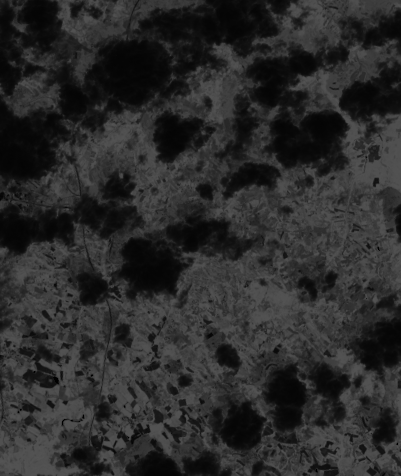

In [1]:
import requests

query = '''
for R in (L8_B4_32631_30), NIR in (L8_B5_32631_30)
return 
encode( (
(
    ( ((NIR*0.00002) - 0.1  ) - ( (R*0.00002) - 0.1 ) ) /
    ( ((NIR*0.00002)  - 0.1 ) + ( (R*0.00002)  - 0.1 ) )
)
[E(377983:390000),N(4902991:4917275),unix(1433068497)] )*100
, "png")
'''

resp = requests.post('http://eodataservice.org/rasdaman/ows/wcps', data = {'query':query})

from IPython.display import Image 
Image(data=resp.content)

We will now showcase some domain specific examples and uses of WCPS